# Домашнее задание по лекции "Современные сверточные архитектуры"

Возьмите датасет www.kaggle.com...ta/kernels

Обучите на нем модели ResNet 18 и VGG 16 с нуля (5-10 эпох)

In [80]:
# Библиотеки

import torch
from torch import nn
import torchvision as tv
import time
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL


In [5]:
# Грузим данные

data_transforms = {
    'train': tv.transforms.Compose([
        tv.transforms.RandomResizedCrop(224),
        tv.transforms.ToTensor(),
        tv.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': tv.transforms.Compose([
        tv.transforms.Resize(256),
        tv.transforms.CenterCrop(224),
        tv.transforms.ToTensor(),
        tv.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [15]:
data_dir = 'hymenoptera_data'
image_datasets = {x: tv.datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=BATCH_SIZE,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

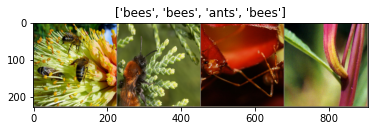

In [16]:
# Рисуем примеры картинок

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = tv.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])


In [31]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = torch.Tensor([0]), 0
    net.eval()
    for X, y in data_iter:
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [25]:
def train(net, train_iter, test_iter, trainer, num_epochs):
    loss = nn.CrossEntropyLoss(reduction='sum')
    net.train()
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            trainer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
            print("Step. time since epoch: {:.3f}. Train acc: {:.3f}. Train Loss: {:.3f}".format(time.time() -  start,
                (y_hat.argmax(axis=1) == y).sum().item() / y.shape[0], l.item()))
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))

In [32]:
# Обучаем resnet 18

model_resnet = tv.models.resnet18(pretrained=False)

criterion = nn.CrossEntropyLoss()

optimizer_ft = torch.optim.SGD(model_resnet.parameters(), lr=0.001, momentum=0.9)


In [33]:
train(model_resnet, dataloaders['train'], dataloaders['val'], optimizer_ft, 5)


Step. time since epoch: 2.629. Train acc: 0.000. Train Loss: 25.945
Step. time since epoch: 3.023. Train acc: 0.250. Train Loss: 26.275
Step. time since epoch: 3.441. Train acc: 0.750. Train Loss: 16.633
Step. time since epoch: 3.807. Train acc: 0.750. Train Loss: 11.516
Step. time since epoch: 4.175. Train acc: 0.500. Train Loss: 11.647
Step. time since epoch: 4.549. Train acc: 0.750. Train Loss: 4.761
Step. time since epoch: 4.913. Train acc: 0.500. Train Loss: 10.642
Step. time since epoch: 5.290. Train acc: 0.500. Train Loss: 5.171
Step. time since epoch: 5.659. Train acc: 0.500. Train Loss: 4.082
Step. time since epoch: 6.064. Train acc: 0.500. Train Loss: 5.828
Step. time since epoch: 6.435. Train acc: 0.500. Train Loss: 7.888
Step. time since epoch: 6.810. Train acc: 1.000. Train Loss: 0.134
Step. time since epoch: 7.183. Train acc: 0.500. Train Loss: 6.853
Step. time since epoch: 7.638. Train acc: 1.000. Train Loss: 0.508
Step. time since epoch: 8.051. Train acc: 0.500. Train L

Step. time since epoch: 25.526. Train acc: 0.250. Train Loss: 2.893
Step. time since epoch: 25.937. Train acc: 1.000. Train Loss: 1.316
epoch 2, loss 1.0295, train acc 0.455, test acc 0.458, time 73.2 sec
Step. time since epoch: 2.130. Train acc: 0.500. Train Loss: 6.073
Step. time since epoch: 2.491. Train acc: 0.500. Train Loss: 5.404
Step. time since epoch: 2.869. Train acc: 0.500. Train Loss: 4.256
Step. time since epoch: 3.231. Train acc: 0.750. Train Loss: 2.245
Step. time since epoch: 3.604. Train acc: 0.250. Train Loss: 3.138
Step. time since epoch: 3.975. Train acc: 0.000. Train Loss: 4.168
Step. time since epoch: 4.410. Train acc: 0.250. Train Loss: 3.639
Step. time since epoch: 4.842. Train acc: 0.500. Train Loss: 2.920
Step. time since epoch: 5.338. Train acc: 1.000. Train Loss: 2.423
Step. time since epoch: 5.760. Train acc: 0.500. Train Loss: 3.457
Step. time since epoch: 6.148. Train acc: 0.500. Train Loss: 3.821
Step. time since epoch: 6.590. Train acc: 0.750. Train Los

Step. time since epoch: 24.337. Train acc: 0.500. Train Loss: 3.355
Step. time since epoch: 24.721. Train acc: 0.750. Train Loss: 2.393
Step. time since epoch: 25.156. Train acc: 0.500. Train Loss: 3.138
Step. time since epoch: 25.620. Train acc: 0.250. Train Loss: 3.587
epoch 4, loss 0.7821, train acc 0.529, test acc 0.451, time 73.1 sec
Step. time since epoch: 2.223. Train acc: 0.250. Train Loss: 2.995
Step. time since epoch: 2.629. Train acc: 0.500. Train Loss: 2.947
Step. time since epoch: 3.041. Train acc: 0.500. Train Loss: 3.133
Step. time since epoch: 3.418. Train acc: 0.250. Train Loss: 4.669
Step. time since epoch: 3.819. Train acc: 0.750. Train Loss: 2.343
Step. time since epoch: 4.285. Train acc: 0.250. Train Loss: 4.115
Step. time since epoch: 4.760. Train acc: 0.750. Train Loss: 2.571
Step. time since epoch: 5.235. Train acc: 0.750. Train Loss: 2.510
Step. time since epoch: 5.679. Train acc: 0.250. Train Loss: 2.798
Step. time since epoch: 6.045. Train acc: 0.750. Train L

In [68]:
# Обучаем vgg 16

model_vgg = tv.models.vgg16(pretrained=False)

criterion = nn.CrossEntropyLoss()

optimizer_ft = torch.optim.SGD(model_vgg.parameters(), lr=0.001, momentum=0.9)

/Users/vandal/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/vandal/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [69]:
train(model_vgg, dataloaders['train'], dataloaders['val'], optimizer_ft, 5)


Step. time since epoch: 4.279. Train acc: 0.000. Train Loss: 28.014
Step. time since epoch: 6.772. Train acc: 0.000. Train Loss: 27.601
Step. time since epoch: 8.995. Train acc: 0.500. Train Loss: 26.770
Step. time since epoch: 11.158. Train acc: 0.500. Train Loss: 26.128
Step. time since epoch: 13.503. Train acc: 0.250. Train Loss: 24.070
Step. time since epoch: 15.836. Train acc: 0.750. Train Loss: 13.751
Step. time since epoch: 18.091. Train acc: 0.500. Train Loss: 24.166
Step. time since epoch: 20.406. Train acc: 0.500. Train Loss: 192.482
Step. time since epoch: 22.740. Train acc: 0.500. Train Loss: 26.832
Step. time since epoch: 25.103. Train acc: 0.750. Train Loss: 26.671
Step. time since epoch: 27.725. Train acc: 0.500. Train Loss: 26.103
Step. time since epoch: 29.997. Train acc: 0.500. Train Loss: 24.680
Step. time since epoch: 32.294. Train acc: 0.250. Train Loss: 16.143
Step. time since epoch: 34.680. Train acc: 0.750. Train Loss: 13.303
Step. time since epoch: 60.053. Trai

Step. time since epoch: 137.230. Train acc: 0.500. Train Loss: 4.111
Step. time since epoch: 139.547. Train acc: 0.500. Train Loss: 3.723
Step. time since epoch: 142.073. Train acc: 0.750. Train Loss: 2.283
epoch 2, loss 0.8956, train acc 0.504, test acc 0.458, time 206.9 sec
Step. time since epoch: 3.913. Train acc: 0.250. Train Loss: 3.314
Step. time since epoch: 6.128. Train acc: 0.500. Train Loss: 2.824
Step. time since epoch: 8.346. Train acc: 0.250. Train Loss: 3.892
Step. time since epoch: 10.661. Train acc: 0.500. Train Loss: 3.193
Step. time since epoch: 13.150. Train acc: 0.250. Train Loss: 3.979
Step. time since epoch: 15.377. Train acc: 0.500. Train Loss: 2.923
Step. time since epoch: 17.585. Train acc: 0.750. Train Loss: 2.782
Step. time since epoch: 19.905. Train acc: 0.500. Train Loss: 2.859
Step. time since epoch: 22.099. Train acc: 0.250. Train Loss: 3.166
Step. time since epoch: 24.403. Train acc: 0.000. Train Loss: 3.302
Step. time since epoch: 26.878. Train acc: 0.5

Step. time since epoch: 130.444. Train acc: 0.750. Train Loss: 2.412
Step. time since epoch: 133.003. Train acc: 0.500. Train Loss: 2.964
Step. time since epoch: 135.263. Train acc: 0.500. Train Loss: 2.964
Step. time since epoch: 137.485. Train acc: 0.750. Train Loss: 2.402
Step. time since epoch: 139.801. Train acc: 0.250. Train Loss: 3.449
Step. time since epoch: 142.036. Train acc: 0.750. Train Loss: 2.507
Step. time since epoch: 144.429. Train acc: 0.250. Train Loss: 3.076
epoch 4, loss 0.7790, train acc 0.512, test acc 0.542, time 209.5 sec
Step. time since epoch: 4.019. Train acc: 0.500. Train Loss: 2.788
Step. time since epoch: 6.269. Train acc: 0.750. Train Loss: 2.616
Step. time since epoch: 8.467. Train acc: 0.750. Train Loss: 2.418
Step. time since epoch: 10.711. Train acc: 0.750. Train Loss: 2.291
Step. time since epoch: 13.060. Train acc: 0.250. Train Loss: 4.580
Step. time since epoch: 15.468. Train acc: 0.250. Train Loss: 4.639
Step. time since epoch: 17.653. Train acc:

Обучите на нем модели ResNet 18 и VGG 16 с использованием Fine-tuning (5-10 эпох)

In [53]:
# Обучаем предобученную resnet 18

model_resnet = tv.models.resnet18(pretrained=True)


In [54]:
## Убираем требование градиента:
for param in model_resnet.parameters():
    param.requires_grad = False

In [55]:
model_resnet.fc

Linear(in_features=512, out_features=1000, bias=True)

In [56]:
# Заменяем последний слой

model_resnet.fc = nn.Linear(in_features=512, out_features=10)

In [57]:
print("Params to learn:")
params_to_update = []
for name,param in model_resnet.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

Params to learn:
	 fc.weight
	 fc.bias


In [58]:
criterion = nn.CrossEntropyLoss()

optimizer_ft = torch.optim.SGD(params_to_update, lr=0.001, momentum=0.9)

In [59]:
train(model_resnet, dataloaders['train'], dataloaders['val'], optimizer_ft, 5)


Step. time since epoch: 1.582. Train acc: 0.500. Train Loss: 8.108
Step. time since epoch: 1.721. Train acc: 0.500. Train Loss: 8.669
Step. time since epoch: 1.874. Train acc: 0.500. Train Loss: 5.458
Step. time since epoch: 2.013. Train acc: 0.500. Train Loss: 3.982
Step. time since epoch: 2.157. Train acc: 0.500. Train Loss: 2.713
Step. time since epoch: 2.302. Train acc: 0.500. Train Loss: 4.313
Step. time since epoch: 2.444. Train acc: 0.750. Train Loss: 2.588
Step. time since epoch: 2.581. Train acc: 0.000. Train Loss: 7.716
Step. time since epoch: 2.730. Train acc: 0.250. Train Loss: 4.161
Step. time since epoch: 2.899. Train acc: 0.500. Train Loss: 2.536
Step. time since epoch: 3.042. Train acc: 0.250. Train Loss: 5.758
Step. time since epoch: 3.165. Train acc: 0.500. Train Loss: 3.735
Step. time since epoch: 3.289. Train acc: 1.000. Train Loss: 0.890
Step. time since epoch: 3.400. Train acc: 0.500. Train Loss: 3.794
Step. time since epoch: 3.515. Train acc: 1.000. Train Loss: 0

epoch 2, loss 0.2364, train acc 0.922, test acc 0.889, time 54.5 sec
Step. time since epoch: 2.216. Train acc: 0.750. Train Loss: 1.342
Step. time since epoch: 2.355. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 2.482. Train acc: 1.000. Train Loss: 0.127
Step. time since epoch: 2.620. Train acc: 0.750. Train Loss: 1.692
Step. time since epoch: 2.764. Train acc: 0.750. Train Loss: 2.389
Step. time since epoch: 2.917. Train acc: 1.000. Train Loss: 0.200
Step. time since epoch: 3.059. Train acc: 1.000. Train Loss: 0.014
Step. time since epoch: 3.200. Train acc: 1.000. Train Loss: 0.514
Step. time since epoch: 3.347. Train acc: 1.000. Train Loss: 0.043
Step. time since epoch: 3.487. Train acc: 1.000. Train Loss: 0.162
Step. time since epoch: 3.620. Train acc: 0.750. Train Loss: 6.713
Step. time since epoch: 3.760. Train acc: 0.500. Train Loss: 5.596
Step. time since epoch: 3.910. Train acc: 1.000. Train Loss: 0.002
Step. time since epoch: 4.055. Train acc: 1.000. Train Loss:

Step. time since epoch: 10.412. Train acc: 1.000. Train Loss: 0.024
epoch 4, loss 0.1733, train acc 0.930, test acc 0.948, time 57.0 sec
Step. time since epoch: 1.919. Train acc: 1.000. Train Loss: 0.250
Step. time since epoch: 2.075. Train acc: 1.000. Train Loss: 0.012
Step. time since epoch: 2.208. Train acc: 0.750. Train Loss: 2.010
Step. time since epoch: 2.335. Train acc: 0.750. Train Loss: 4.272
Step. time since epoch: 2.468. Train acc: 1.000. Train Loss: 0.001
Step. time since epoch: 2.600. Train acc: 1.000. Train Loss: 0.227
Step. time since epoch: 2.741. Train acc: 0.750. Train Loss: 2.664
Step. time since epoch: 2.876. Train acc: 1.000. Train Loss: 0.009
Step. time since epoch: 2.999. Train acc: 1.000. Train Loss: 0.021
Step. time since epoch: 3.115. Train acc: 1.000. Train Loss: 0.478
Step. time since epoch: 3.234. Train acc: 1.000. Train Loss: 0.008
Step. time since epoch: 3.354. Train acc: 1.000. Train Loss: 0.008
Step. time since epoch: 3.477. Train acc: 1.000. Train Loss

In [70]:
# # Обучаем предобученную vgg 16

model_vgg = tv.models.vgg16(pretrained=True)


/Users/vandal/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/vandal/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [71]:
## Убираем требование градиента:
for param in model_vgg.parameters():
    param.requires_grad = False



In [74]:
# Заменяем последний слой

model_vgg.classifier[6] = nn.Linear(in_features=4096, out_features=10)

In [75]:
print("Params to learn:")
params_to_update = []
for name,param in model_vgg.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

Params to learn:
	 classifier.6.weight
	 classifier.6.bias


In [76]:
criterion = nn.CrossEntropyLoss()

optimizer_ft = torch.optim.SGD(params_to_update, lr=0.001, momentum=0.9)

In [77]:
train(model_vgg, dataloaders['train'], dataloaders['val'], optimizer_ft, 5)


Step. time since epoch: 2.472. Train acc: 0.000. Train Loss: 9.786
Step. time since epoch: 3.139. Train acc: 0.750. Train Loss: 4.423
Step. time since epoch: 3.838. Train acc: 0.500. Train Loss: 5.166
Step. time since epoch: 4.501. Train acc: 0.750. Train Loss: 2.584
Step. time since epoch: 5.212. Train acc: 1.000. Train Loss: 0.230
Step. time since epoch: 5.891. Train acc: 0.750. Train Loss: 7.126
Step. time since epoch: 6.595. Train acc: 0.500. Train Loss: 4.855
Step. time since epoch: 7.279. Train acc: 1.000. Train Loss: 0.053
Step. time since epoch: 7.998. Train acc: 1.000. Train Loss: 0.083
Step. time since epoch: 8.666. Train acc: 1.000. Train Loss: 0.654
Step. time since epoch: 9.327. Train acc: 0.750. Train Loss: 9.159
Step. time since epoch: 10.120. Train acc: 1.000. Train Loss: 0.004
Step. time since epoch: 10.937. Train acc: 0.750. Train Loss: 1.166
Step. time since epoch: 11.578. Train acc: 1.000. Train Loss: 0.001
Step. time since epoch: 12.228. Train acc: 1.000. Train Los

Step. time since epoch: 44.602. Train acc: 1.000. Train Loss: 0.016
Step. time since epoch: 45.286. Train acc: 1.000. Train Loss: 0.000
epoch 2, loss 0.6480, train acc 0.914, test acc 0.948, time 112.6 sec
Step. time since epoch: 2.199. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 2.832. Train acc: 0.750. Train Loss: 6.341
Step. time since epoch: 3.480. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 4.142. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 4.831. Train acc: 0.750. Train Loss: 4.339
Step. time since epoch: 5.483. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 6.135. Train acc: 0.500. Train Loss: 6.674
Step. time since epoch: 6.942. Train acc: 1.000. Train Loss: 0.068
Step. time since epoch: 7.703. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 8.333. Train acc: 1.000. Train Loss: 0.001
Step. time since epoch: 8.963. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 9.604. Train acc: 0.750. Train Lo

Step. time since epoch: 41.219. Train acc: 1.000. Train Loss: 0.013
Step. time since epoch: 41.922. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 42.598. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 43.276. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 43.997. Train acc: 1.000. Train Loss: 0.000
epoch 4, loss 0.2389, train acc 0.947, test acc 0.948, time 111.1 sec
Step. time since epoch: 2.273. Train acc: 0.750. Train Loss: 4.268
Step. time since epoch: 2.938. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 3.625. Train acc: 1.000. Train Loss: 0.302
Step. time since epoch: 4.305. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 5.104. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 5.908. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 6.617. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 7.297. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 7.981. Train acc: 1.000. Train

Добавьте аугментацию данных к пункту 2

In [81]:
# Делаем аугментацию данных

data_transforms_aug = {
    'train': tv.transforms.Compose([
        tv.transforms.RandomResizedCrop(224),
        tv.transforms.RandomHorizontalFlip(), 
        tv.transforms.ColorJitter(hue=.05, saturation=.05),
        tv.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
        tv.transforms.ToTensor(),
        tv.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': tv.transforms.Compose([
        tv.transforms.Resize(256),
        tv.transforms.CenterCrop(224),
        tv.transforms.ToTensor(),
        tv.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

/Users/vandal/anaconda3/lib/python3.8/site-packages/torchvision/transforms/transforms.py:1297: UserWarning: The parameter 'resample' is deprecated since 0.12 and will be removed 0.14. Please use 'interpolation' instead.
  warnings.warn(


In [83]:
image_datasets_aug = {x: tv.datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms_aug[x])
                  for x in ['train', 'val']}
dataloaders_aug = {x: torch.utils.data.DataLoader(image_datasets_aug[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes_aug = {x: len(image_datasets_aug[x]) for x in ['train', 'val']}
class_names_aug = image_datasets_aug['train'].classes

In [84]:
# Обучаем предобученную resnet 18

model_resnet = tv.models.resnet18(pretrained=True)


/Users/vandal/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/vandal/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [85]:
## Убираем требование градиента:
for param in model_resnet.parameters():
    param.requires_grad = False

In [86]:
model_resnet.fc = nn.Linear(in_features=512, out_features=10)

In [87]:
print("Params to learn:")
params_to_update = []
for name,param in model_resnet.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

Params to learn:
	 fc.weight
	 fc.bias


In [88]:
criterion = nn.CrossEntropyLoss()

optimizer_ft = torch.optim.SGD(params_to_update, lr=0.001, momentum=0.9)

In [89]:
train(model_resnet, dataloaders_aug['train'], dataloaders_aug['val'], optimizer_ft, 5)


Step. time since epoch: 3.082. Train acc: 0.000. Train Loss: 11.021
Step. time since epoch: 3.232. Train acc: 0.500. Train Loss: 6.759
Step. time since epoch: 3.381. Train acc: 0.000. Train Loss: 6.319
Step. time since epoch: 3.533. Train acc: 0.500. Train Loss: 3.496
Step. time since epoch: 3.677. Train acc: 0.750. Train Loss: 1.615
Step. time since epoch: 3.817. Train acc: 0.500. Train Loss: 4.829
Step. time since epoch: 3.970. Train acc: 0.500. Train Loss: 3.489
Step. time since epoch: 4.122. Train acc: 0.500. Train Loss: 2.192
Step. time since epoch: 4.284. Train acc: 0.500. Train Loss: 2.240
Step. time since epoch: 4.464. Train acc: 1.000. Train Loss: 1.107
Step. time since epoch: 4.639. Train acc: 1.000. Train Loss: 0.978
Step. time since epoch: 4.867. Train acc: 1.000. Train Loss: 0.948
Step. time since epoch: 5.047. Train acc: 1.000. Train Loss: 0.661
Step. time since epoch: 5.224. Train acc: 1.000. Train Loss: 0.959
Step. time since epoch: 5.397. Train acc: 0.500. Train Loss: 

Step. time since epoch: 10.232. Train acc: 1.000. Train Loss: 0.003
epoch 2, loss 0.3620, train acc 0.861, test acc 0.908, time 62.7 sec
Step. time since epoch: 2.071. Train acc: 0.750. Train Loss: 2.124
Step. time since epoch: 2.237. Train acc: 0.750. Train Loss: 3.415
Step. time since epoch: 2.403. Train acc: 1.000. Train Loss: 0.113
Step. time since epoch: 2.543. Train acc: 0.750. Train Loss: 4.597
Step. time since epoch: 2.677. Train acc: 0.750. Train Loss: 1.155
Step. time since epoch: 2.810. Train acc: 0.750. Train Loss: 4.238
Step. time since epoch: 2.941. Train acc: 1.000. Train Loss: 0.004
Step. time since epoch: 3.068. Train acc: 0.750. Train Loss: 1.605
Step. time since epoch: 3.202. Train acc: 1.000. Train Loss: 0.185
Step. time since epoch: 3.332. Train acc: 0.750. Train Loss: 3.782
Step. time since epoch: 3.461. Train acc: 1.000. Train Loss: 0.196
Step. time since epoch: 3.591. Train acc: 0.750. Train Loss: 2.192
Step. time since epoch: 3.725. Train acc: 1.000. Train Loss

Step. time since epoch: 10.530. Train acc: 0.750. Train Loss: 1.553
epoch 4, loss 0.5129, train acc 0.869, test acc 0.935, time 57.6 sec
Step. time since epoch: 1.935. Train acc: 0.750. Train Loss: 3.941
Step. time since epoch: 2.100. Train acc: 1.000. Train Loss: 0.001
Step. time since epoch: 2.279. Train acc: 1.000. Train Loss: 0.019
Step. time since epoch: 2.439. Train acc: 1.000. Train Loss: 0.009
Step. time since epoch: 2.598. Train acc: 1.000. Train Loss: 0.005
Step. time since epoch: 2.763. Train acc: 1.000. Train Loss: 0.001
Step. time since epoch: 2.924. Train acc: 1.000. Train Loss: 0.628
Step. time since epoch: 3.084. Train acc: 0.750. Train Loss: 1.818
Step. time since epoch: 3.256. Train acc: 0.750. Train Loss: 0.946
Step. time since epoch: 3.433. Train acc: 1.000. Train Loss: 0.041
Step. time since epoch: 3.596. Train acc: 1.000. Train Loss: 0.196
Step. time since epoch: 3.745. Train acc: 1.000. Train Loss: 0.003
Step. time since epoch: 3.879. Train acc: 1.000. Train Loss

In [90]:
# Обучаем предобученную vgg 16

model_vgg = tv.models.vgg16(pretrained=True)


/Users/vandal/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [91]:
## Убираем требование градиента:
for param in model_vgg.parameters():
    param.requires_grad = False



In [92]:
model_vgg.classifier[6] = nn.Linear(in_features=4096, out_features=10)

In [93]:
print("Params to learn:")
params_to_update = []
for name,param in model_vgg.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

Params to learn:
	 classifier.6.weight
	 classifier.6.bias


In [94]:
criterion = nn.CrossEntropyLoss()

optimizer_ft = torch.optim.SGD(params_to_update, lr=0.001, momentum=0.9)

In [95]:
train(model_vgg, dataloaders_aug['train'], dataloaders_aug['val'], optimizer_ft, 5)


Step. time since epoch: 3.101. Train acc: 0.250. Train Loss: 8.936
Step. time since epoch: 3.936. Train acc: 0.250. Train Loss: 10.040
Step. time since epoch: 4.739. Train acc: 0.750. Train Loss: 3.011
Step. time since epoch: 5.538. Train acc: 0.750. Train Loss: 3.795
Step. time since epoch: 6.381. Train acc: 0.750. Train Loss: 1.332
Step. time since epoch: 7.169. Train acc: 0.750. Train Loss: 2.007
Step. time since epoch: 8.008. Train acc: 0.250. Train Loss: 9.111
Step. time since epoch: 8.823. Train acc: 1.000. Train Loss: 0.278
Step. time since epoch: 9.703. Train acc: 1.000. Train Loss: 0.027
Step. time since epoch: 10.507. Train acc: 0.750. Train Loss: 3.785
Step. time since epoch: 11.463. Train acc: 0.750. Train Loss: 2.401
Step. time since epoch: 12.461. Train acc: 0.750. Train Loss: 0.745
Step. time since epoch: 13.297. Train acc: 0.750. Train Loss: 7.925
Step. time since epoch: 14.096. Train acc: 0.750. Train Loss: 0.747
Step. time since epoch: 14.935. Train acc: 1.000. Train 

Step. time since epoch: 53.565. Train acc: 0.750. Train Loss: 6.185
Step. time since epoch: 54.524. Train acc: 1.000. Train Loss: 0.038
epoch 2, loss 0.4088, train acc 0.914, test acc 0.935, time 127.9 sec
Step. time since epoch: 3.034. Train acc: 0.750. Train Loss: 6.185
Step. time since epoch: 3.991. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 4.979. Train acc: 0.750. Train Loss: 5.794
Step. time since epoch: 5.809. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 6.638. Train acc: 1.000. Train Loss: 0.002
Step. time since epoch: 7.459. Train acc: 1.000. Train Loss: 0.004
Step. time since epoch: 8.256. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 9.093. Train acc: 1.000. Train Loss: 0.612
Step. time since epoch: 9.974. Train acc: 1.000. Train Loss: 0.281
Step. time since epoch: 10.792. Train acc: 1.000. Train Loss: 0.009
Step. time since epoch: 11.630. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 12.431. Train acc: 1.000. Train

Step. time since epoch: 52.506. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 53.291. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 54.106. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 54.922. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 55.801. Train acc: 1.000. Train Loss: 0.425
epoch 4, loss 0.5487, train acc 0.918, test acc 0.987, time 129.5 sec
Step. time since epoch: 2.583. Train acc: 0.750. Train Loss: 6.136
Step. time since epoch: 3.401. Train acc: 1.000. Train Loss: 0.001
Step. time since epoch: 4.323. Train acc: 0.500. Train Loss: 13.407
Step. time since epoch: 5.170. Train acc: 0.750. Train Loss: 4.159
Step. time since epoch: 6.075. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 7.038. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 7.953. Train acc: 0.750. Train Loss: 2.044
Step. time since epoch: 8.820. Train acc: 1.000. Train Loss: 0.000
Step. time since epoch: 9.611. Train acc: 1.000. Trai

### Выводы
С применением аугментации данных качество выросло (что логично). Лучшее качество показала предобученная VGG 16.

### Задание со звездочкой
Примените Fine-tuning ResNet 18 к Fashion Mnist. Удалось ли увидеть резкое увеличение качества?

In [111]:
transoforms = tv.transforms.Compose([
    tv.transforms.Grayscale(3),
    tv.transforms.Resize((224,224)),
    tv.transforms.ToTensor()
])

BATCH_SIZE = 256
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=transoforms, download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=transoforms, download=True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [112]:
model_resnet = tv.models.resnet18(pretrained=True)

## Убираем требование градиента:
for param in model_resnet.parameters():
    param.requires_grad = False

In [113]:
model_resnet.fc = nn.Linear(in_features=512, out_features=10)

In [114]:
print("Params to learn:")
params_to_update = []
for name,param in model_resnet.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

Params to learn:
	 fc.weight
	 fc.bias


In [115]:
criterion = nn.CrossEntropyLoss()

optimizer_ft = torch.optim.SGD(params_to_update, lr=0.001, momentum=0.9)

In [116]:
train(model_resnet, train_iter, test_iter, optimizer_ft, 5)


Step. time since epoch: 8.564. Train acc: 0.121. Train Loss: 623.311
Step. time since epoch: 17.332. Train acc: 0.262. Train Loss: 1167.927
Step. time since epoch: 25.706. Train acc: 0.215. Train Loss: 2292.578
Step. time since epoch: 34.150. Train acc: 0.098. Train Loss: 4202.280
Step. time since epoch: 42.849. Train acc: 0.297. Train Loss: 8307.695
Step. time since epoch: 51.123. Train acc: 0.297. Train Loss: 9499.348
Step. time since epoch: 59.689. Train acc: 0.379. Train Loss: 9534.690
Step. time since epoch: 68.679. Train acc: 0.316. Train Loss: 10069.137
Step. time since epoch: 77.220. Train acc: 0.305. Train Loss: 10699.498
Step. time since epoch: 85.868. Train acc: 0.234. Train Loss: 11348.114
Step. time since epoch: 96.505. Train acc: 0.223. Train Loss: 10345.746
Step. time since epoch: 108.879. Train acc: 0.414. Train Loss: 9116.923
Step. time since epoch: 118.074. Train acc: 0.453. Train Loss: 8220.641
Step. time since epoch: 126.495. Train acc: 0.488. Train Loss: 8199.102
S

Step. time since epoch: 1045.659. Train acc: 0.750. Train Loss: 840.005
Step. time since epoch: 1054.345. Train acc: 0.777. Train Loss: 698.773
Step. time since epoch: 1062.584. Train acc: 0.746. Train Loss: 729.188
Step. time since epoch: 1070.626. Train acc: 0.836. Train Loss: 421.570
Step. time since epoch: 1079.052. Train acc: 0.828. Train Loss: 488.840
Step. time since epoch: 1088.602. Train acc: 0.738. Train Loss: 745.204
Step. time since epoch: 1097.060. Train acc: 0.805. Train Loss: 502.973
Step. time since epoch: 1105.736. Train acc: 0.793. Train Loss: 461.089
Step. time since epoch: 1113.873. Train acc: 0.836. Train Loss: 474.264
Step. time since epoch: 1122.208. Train acc: 0.820. Train Loss: 533.718
Step. time since epoch: 1135.088. Train acc: 0.844. Train Loss: 597.345
Step. time since epoch: 1144.449. Train acc: 0.852. Train Loss: 649.256
Step. time since epoch: 1153.509. Train acc: 0.832. Train Loss: 518.954
Step. time since epoch: 1162.109. Train acc: 0.816. Train Loss: 

Step. time since epoch: 2044.125. Train acc: 0.793. Train Loss: 443.098
Step. time since epoch: 2051.943. Train acc: 0.848. Train Loss: 223.235
Step. time since epoch: 2060.790. Train acc: 0.801. Train Loss: 484.886
Step. time since epoch: 2069.518. Train acc: 0.801. Train Loss: 294.854
Step. time since epoch: 2078.750. Train acc: 0.801. Train Loss: 358.858
Step. time since epoch: 2082.308. Train acc: 0.854. Train Loss: 108.105
epoch 1, loss 4.4434, train acc 0.767, test acc 0.835, time 2401.1 sec
Step. time since epoch: 7.550. Train acc: 0.875. Train Loss: 261.557
Step. time since epoch: 15.128. Train acc: 0.824. Train Loss: 279.247
Step. time since epoch: 22.845. Train acc: 0.895. Train Loss: 189.719
Step. time since epoch: 30.139. Train acc: 0.859. Train Loss: 252.333
Step. time since epoch: 37.824. Train acc: 0.793. Train Loss: 393.899
Step. time since epoch: 45.234. Train acc: 0.859. Train Loss: 318.967
Step. time since epoch: 52.741. Train acc: 0.824. Train Loss: 421.670
Step. ti

Step. time since epoch: 859.609. Train acc: 0.785. Train Loss: 416.004
Step. time since epoch: 865.924. Train acc: 0.844. Train Loss: 327.232
Step. time since epoch: 872.478. Train acc: 0.789. Train Loss: 459.892
Step. time since epoch: 878.754. Train acc: 0.844. Train Loss: 272.379
Step. time since epoch: 885.285. Train acc: 0.828. Train Loss: 313.810
Step. time since epoch: 891.525. Train acc: 0.793. Train Loss: 456.671
Step. time since epoch: 898.071. Train acc: 0.820. Train Loss: 312.951
Step. time since epoch: 904.496. Train acc: 0.773. Train Loss: 580.507
Step. time since epoch: 911.049. Train acc: 0.797. Train Loss: 409.523
Step. time since epoch: 917.259. Train acc: 0.840. Train Loss: 335.581
Step. time since epoch: 923.845. Train acc: 0.793. Train Loss: 506.100
Step. time since epoch: 930.076. Train acc: 0.762. Train Loss: 460.504
Step. time since epoch: 936.873. Train acc: 0.805. Train Loss: 386.491
Step. time since epoch: 943.062. Train acc: 0.855. Train Loss: 268.904
Step. 

Step. time since epoch: 1605.131. Train acc: 0.863. Train Loss: 264.964
Step. time since epoch: 1611.682. Train acc: 0.844. Train Loss: 325.677
Step. time since epoch: 1618.032. Train acc: 0.805. Train Loss: 351.971
Step. time since epoch: 1624.640. Train acc: 0.801. Train Loss: 334.610
Step. time since epoch: 1630.907. Train acc: 0.824. Train Loss: 345.809
Step. time since epoch: 1637.488. Train acc: 0.809. Train Loss: 342.746
Step. time since epoch: 1644.059. Train acc: 0.816. Train Loss: 388.945
Step. time since epoch: 1650.923. Train acc: 0.766. Train Loss: 532.054
Step. time since epoch: 1657.262. Train acc: 0.820. Train Loss: 296.372
Step. time since epoch: 1663.811. Train acc: 0.793. Train Loss: 413.749
Step. time since epoch: 1666.225. Train acc: 0.844. Train Loss: 70.787
epoch 2, loss 1.4329, train acc 0.823, test acc 0.838, time 1917.9 sec
Step. time since epoch: 6.493. Train acc: 0.848. Train Loss: 259.002
Step. time since epoch: 12.796. Train acc: 0.828. Train Loss: 255.529

Step. time since epoch: 678.904. Train acc: 0.785. Train Loss: 560.758
Step. time since epoch: 685.372. Train acc: 0.828. Train Loss: 274.081
Step. time since epoch: 691.805. Train acc: 0.805. Train Loss: 386.881
Step. time since epoch: 698.198. Train acc: 0.840. Train Loss: 434.281
Step. time since epoch: 704.529. Train acc: 0.852. Train Loss: 272.419
Step. time since epoch: 711.035. Train acc: 0.797. Train Loss: 348.454
Step. time since epoch: 717.368. Train acc: 0.832. Train Loss: 427.415
Step. time since epoch: 723.821. Train acc: 0.797. Train Loss: 441.231
Step. time since epoch: 730.155. Train acc: 0.809. Train Loss: 321.954
Step. time since epoch: 736.703. Train acc: 0.836. Train Loss: 292.418
Step. time since epoch: 742.977. Train acc: 0.789. Train Loss: 333.480
Step. time since epoch: 749.411. Train acc: 0.797. Train Loss: 359.130
Step. time since epoch: 755.879. Train acc: 0.844. Train Loss: 297.082
Step. time since epoch: 762.275. Train acc: 0.809. Train Loss: 330.801
Step. 

Step. time since epoch: 1418.293. Train acc: 0.809. Train Loss: 310.014
Step. time since epoch: 1424.784. Train acc: 0.777. Train Loss: 620.041
Step. time since epoch: 1430.966. Train acc: 0.770. Train Loss: 624.185
Step. time since epoch: 1437.418. Train acc: 0.762. Train Loss: 523.643
Step. time since epoch: 1443.588. Train acc: 0.758. Train Loss: 616.962
Step. time since epoch: 1450.024. Train acc: 0.816. Train Loss: 456.487
Step. time since epoch: 1456.235. Train acc: 0.848. Train Loss: 311.837
Step. time since epoch: 1462.834. Train acc: 0.777. Train Loss: 580.160
Step. time since epoch: 1468.996. Train acc: 0.754. Train Loss: 523.019
Step. time since epoch: 1475.502. Train acc: 0.836. Train Loss: 412.029
Step. time since epoch: 1481.707. Train acc: 0.828. Train Loss: 368.044
Step. time since epoch: 1488.265. Train acc: 0.867. Train Loss: 219.891
Step. time since epoch: 1494.424. Train acc: 0.805. Train Loss: 349.033
Step. time since epoch: 1500.932. Train acc: 0.848. Train Loss: 

Step. time since epoch: 637.848. Train acc: 0.832. Train Loss: 370.676
Step. time since epoch: 644.098. Train acc: 0.820. Train Loss: 332.687
Step. time since epoch: 650.635. Train acc: 0.836. Train Loss: 346.845
Step. time since epoch: 656.964. Train acc: 0.840. Train Loss: 262.682
Step. time since epoch: 663.631. Train acc: 0.863. Train Loss: 270.170
Step. time since epoch: 670.201. Train acc: 0.816. Train Loss: 457.121
Step. time since epoch: 677.153. Train acc: 0.828. Train Loss: 264.002
Step. time since epoch: 683.403. Train acc: 0.840. Train Loss: 305.799
Step. time since epoch: 689.958. Train acc: 0.809. Train Loss: 414.998
Step. time since epoch: 696.302. Train acc: 0.836. Train Loss: 306.398
Step. time since epoch: 702.895. Train acc: 0.812. Train Loss: 328.510
Step. time since epoch: 709.156. Train acc: 0.848. Train Loss: 323.556
Step. time since epoch: 715.621. Train acc: 0.816. Train Loss: 411.783
Step. time since epoch: 721.881. Train acc: 0.820. Train Loss: 289.414
Step. 

Step. time since epoch: 6883.742. Train acc: 0.781. Train Loss: 446.010
Step. time since epoch: 6908.150. Train acc: 0.883. Train Loss: 181.534
Step. time since epoch: 7824.510. Train acc: 0.824. Train Loss: 324.696
Step. time since epoch: 8728.796. Train acc: 0.816. Train Loss: 271.860
Step. time since epoch: 8741.149. Train acc: 0.832. Train Loss: 315.353
Step. time since epoch: 8766.710. Train acc: 0.828. Train Loss: 237.545
Step. time since epoch: 10572.864. Train acc: 0.801. Train Loss: 378.146
Step. time since epoch: 10579.535. Train acc: 0.805. Train Loss: 293.615
Step. time since epoch: 10595.749. Train acc: 0.766. Train Loss: 451.784
Step. time since epoch: 12083.373. Train acc: 0.828. Train Loss: 314.286
Step. time since epoch: 12987.763. Train acc: 0.859. Train Loss: 163.440
Step. time since epoch: 12994.337. Train acc: 0.793. Train Loss: 357.507
Step. time since epoch: 13017.052. Train acc: 0.824. Train Loss: 276.402
Step. time since epoch: 20235.031. Train acc: 0.789. Trai

Step. time since epoch: 762.136. Train acc: 0.836. Train Loss: 259.600
Step. time since epoch: 769.767. Train acc: 0.789. Train Loss: 389.806
Step. time since epoch: 777.549. Train acc: 0.887. Train Loss: 165.530
Step. time since epoch: 785.433. Train acc: 0.816. Train Loss: 389.803
Step. time since epoch: 793.873. Train acc: 0.805. Train Loss: 379.445
Step. time since epoch: 802.370. Train acc: 0.832. Train Loss: 301.337
Step. time since epoch: 810.443. Train acc: 0.812. Train Loss: 379.383
Step. time since epoch: 818.736. Train acc: 0.836. Train Loss: 283.561
Step. time since epoch: 826.747. Train acc: 0.844. Train Loss: 248.842
Step. time since epoch: 835.307. Train acc: 0.887. Train Loss: 261.442
Step. time since epoch: 843.530. Train acc: 0.812. Train Loss: 393.645
Step. time since epoch: 851.480. Train acc: 0.859. Train Loss: 179.549
Step. time since epoch: 859.948. Train acc: 0.809. Train Loss: 299.198
Step. time since epoch: 868.419. Train acc: 0.812. Train Loss: 302.187
Step. 

Step. time since epoch: 2836.295. Train acc: 0.809. Train Loss: 349.690
Step. time since epoch: 2845.010. Train acc: 0.785. Train Loss: 292.975
Step. time since epoch: 2854.262. Train acc: 0.754. Train Loss: 407.052
Step. time since epoch: 2863.530. Train acc: 0.809. Train Loss: 305.346
Step. time since epoch: 2872.909. Train acc: 0.824. Train Loss: 311.632
Step. time since epoch: 2882.133. Train acc: 0.754. Train Loss: 527.167
Step. time since epoch: 2891.106. Train acc: 0.805. Train Loss: 409.382
Step. time since epoch: 2900.327. Train acc: 0.848. Train Loss: 287.312
Step. time since epoch: 2909.955. Train acc: 0.789. Train Loss: 472.449
Step. time since epoch: 2918.647. Train acc: 0.793. Train Loss: 412.787
Step. time since epoch: 2927.601. Train acc: 0.863. Train Loss: 177.395
Step. time since epoch: 2937.272. Train acc: 0.766. Train Loss: 519.356
Step. time since epoch: 2945.751. Train acc: 0.812. Train Loss: 268.356
Step. time since epoch: 2953.865. Train acc: 0.738. Train Loss: 

### Выводы
Как ни странно предобученная ResNet 18 на FashionMNIST не показала существенного роста. Более того качество на тестовой выборке всего 81,1 очень не высокое